# Execrcice 1

In [64]:
import numpy as np
import pandas as pd
from keras.utils import load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

import random
import os
import cv2

import seaborn as sns
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
from keras import models, layers
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score

Le paludisme est une maladie parasitaire potentiellement mortelle causée par une infection par un protozoaire Plasmodium transmis par un moustique anophèle femelle infectieux.

Le modèle suivant tente de distinguer les cellules infectées par le paludisme de celles qui ne le sont pas.

Répartition de ce exo :

* Chargement de l'ensemble de données : chargez les données et importez les bibliothèques.

* Prétraitement des données :
Lire les images, étiquettes stockées dans 2 dossiers (Parasitisés, Non infectés).

* Afficher les images non infectées et parasitées avec leurs étiquettes respectives.
* Normalisation des données d'image.
* Division des données en test, entrainnement et validation
d'ImageDataGenerator
* Création et formation du modèle
: créez un modèle cnn avec la bibliothèque  KERAS.

* Évaluation : affichez  les métriques d’évaluation et tracer la courbe de validation.



In [65]:
FILES_ROOT_DIR = "../../data/cell_images/"
PARASITITED_FILES_DIR=f"{FILES_ROOT_DIR}/Parasitized/"
UNINFECTED_FILES_DIR=f"{FILES_ROOT_DIR}/Uninfected/"
Parasitized = os.listdir(PARASITITED_FILES_DIR)
Uninfected = os.listdir(UNINFECTED_FILES_DIR)

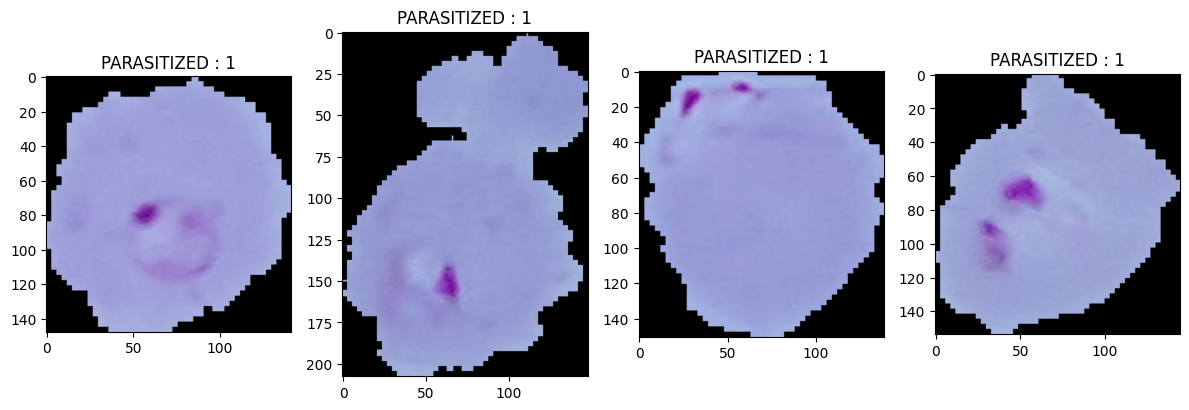

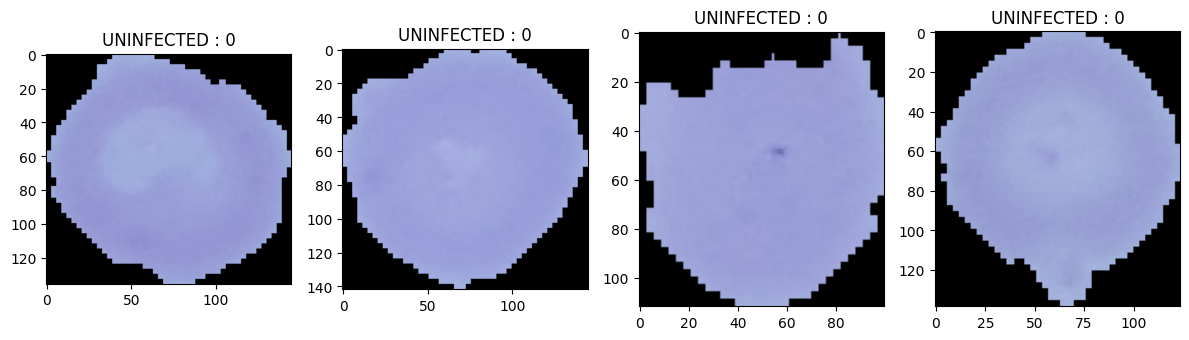

In [66]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(PARASITITED_FILES_DIR + Parasitized[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(2, 4, i+1)
    img = cv2.imread(UNINFECTED_FILES_DIR+ Uninfected[i+1])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

In [ ]:
data = []
labels = []

for img in Parasitized:
    try:
        img_read = cv2.imread(os.path.join(PARASITITED_FILES_DIR, img))
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        pass

for img in Uninfected:
    try:
        img_read = cv2.imread(UNINFECTED_FILES_DIR+ img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        pass


In [69]:
# X=data
# y=labels

X = np.array(data, dtype="float64") / 255.0  # Normalisation des pixels
y = np.array(labels, dtype="float64")        # Important : float32 pour la binary_crossentropy

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, shuffle=True,stratify=y)

X_test, X_val, Y_test, Y_val = train_test_split(X_test,Y_test, test_size=0.5, stratify=Y_test)

# Y_test = np.argmax(Y_test, axis=1)

In [72]:
import numpy as np
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))
# conclusion, la moitié du dataset sont des images affecté, l'autre moité les non affecté

{np.float64(0.0): np.int64(13779), np.float64(1.0): np.int64(13779)}


# Modèle CNN

Question 1 : Proposez une differentes approche modèle CNN  pour résoudre ce problème.

NB: l'objectif est de Proposer differentes approche pour classifier les cellule infecter et non infecter

NB: Le modèle utilise l'optimiseur Adam, la précision étant la métrique


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
def create_cnn_model():
    model = Sequential()

    # Première couche convolutive + pooling
    model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(50, 50, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
# 
    # Deuxième couche convolutive + pooling
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Troisième couche convolutive (ajoutée)
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))  # Pour réduire l'overfitting

    # Passage aux couches entièrement connectées
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))

    # Couche de sortie binaire
    model.add(Dense(1, activation='sigmoid'))

    # Compilation
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [ ]:
"""
def create_cnn_model():
    model = Sequential()
    # Première couche convolutive
    # model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))),
    model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(50, 50, 3)))
    # Première couche de pooling
    model.add(MaxPooling2D(pool_size=(2, 2))),

    # Deuxième couche convolutive
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu')),
    # Deuxième couche de pooling
    model.add(MaxPooling2D(pool_size=(2, 2))),
    # Couche Flatten pour passer aux couches denses
    model.add(Flatten()),
    # Première couche dense
    model.add(Dense(64, activation='relu')),
    # Deuxième couche dense
    model.add(Dense(32, activation='relu'))
    # Couche de sortie (10 classes)

    # model.add(Dense(10, activation='softmax'))
    model.add(Dense(1, activation='sigmoid'))


    model.compile(
            optimizer='adam',
            # loss='categorical_crossentropy',
            loss='binary_crossentropy',
            metrics=['accuracy']
        )
    return model
"""

In [ ]:
models = {
      "cnn_model": create_cnn_model()
}

for name, model in models.items():
        print(f"\n{name}:")
        print(f"  - NB Paramètres: {model.count_params():,}")
        print(f"  - NB Couches: {len(model.layers)}")
        print(f"  - Optimiseur: Adam")
        print(f"  - Métrique: Accuracy")

c:\Users\Admin\Documents\DIT Courses\DL\exam\projet-deeplearning\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



cnn_model:
  - NB Paramètres: 91,297
  - NB Couches: 11
  - Optimiseur: Adam
  - Métrique: Accuracy


### Entrainement

In [ ]:
# Fit CNN model
models["cnn_model"].fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10, batch_size=32)

Epoch 1/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 25s 31ms/step - accuracy: 0.8356 - loss: 0.3430 - val_accuracy: 0.9706 - val_loss: 0.0783
Epoch 2/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.9703 - loss: 0.0825 - val_accuracy: 0.9888 - val_loss: 0.0357
Epoch 3/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.9753 - loss: 0.0675 - val_accuracy: 0.9764 - val_loss: 0.0591
Epoch 4/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - accuracy: 0.9835 - loss: 0.0467 - val_accuracy: 0.9822 - val_loss: 0.0472
Epoch 5/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.9846 - loss: 0.0406 - val_accuracy: 0.9786 - val_loss: 0.0511
Epoch 6/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.9889 - loss: 0.0345 - val_accuracy: 0.9906 - val_loss: 0.0228
Epoch 7/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.9880 - loss: 0.0330 - val_accuracy: 0.9797 - val_loss: 0.0525
Epoch 8/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.9908 - loss: 0.0261 - 

In [ ]:
# Evaluation du modèle CNN

test_loss, test_acc = models["cnn_model"].evaluate(X_test, Y_test, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9798 - loss: 0.0622
Test Accuracy: 0.9822
Test Loss: 0.0596


In [ ]:
type(X_test)

numpy.ndarray

In [ ]:
# Prédictions en probabilité
y_pred_proba = models["cnn_model"].predict(X_test)

# Convertir les probabilités en classes 0 ou 1

y_pred = (y_pred_proba > 0.5).astype("int64")

hello = models["cnn_model"].predict(np.expand_dims(X_test[1], axis=0))
hello

87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[0.00497789]], dtype=float32)

In [ ]:
# Sauvegarde au format .h5
models["cnn_model"].save("../exo1/model/model.h5")